<a href="https://colab.research.google.com/github/the-nameshifter/Camilo/blob/Machine-Learning/Classify_Kyphosis_Disease_Random_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

##### Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns representing data on children who have had corrective spinal surgery.



In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [245]:
Kyphosis_df = pd.read_csv('/content/kyphosis.csv')

In [246]:
Kyphosis_df


Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]

# Transform Present and Absent

In [247]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [248]:
Kyphosis_df.keys()

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [249]:
Kyphosis_df

Kyphosis  Age  Number  Start
0          0   71       3      5
1          0  158       3     14
2          1  128       4      5
3          0    2       5      1
4          0    1       4     15
..       ...  ...     ...    ...
76         1  157       3     13
77         0   26       7     13
78         0  120       2     13
79         1   42       7      6
80         0   36       4     13

[81 rows x 4 columns]

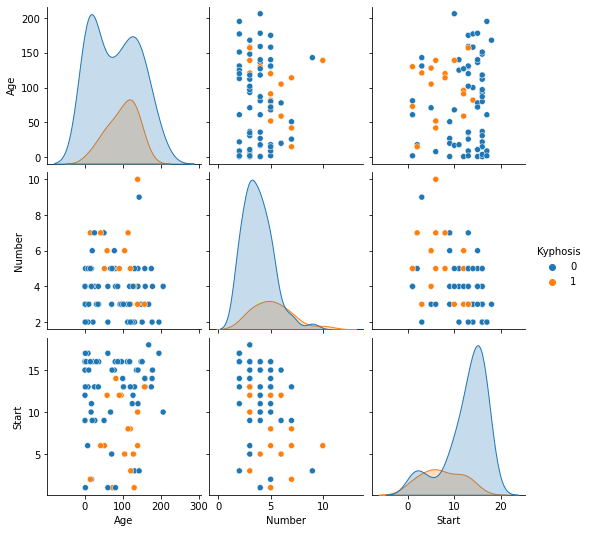

In [250]:
sns.pairplot( Kyphosis_df, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


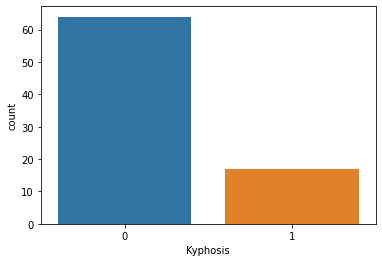

In [251]:
sns.countplot(Kyphosis_df['Kyphosis'], label = 'Blue')

### Disease present after operation

In [252]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [253]:
Kyphosis_False.shape

(64, 4)

In [254]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [255]:
Kyphosis_True.shape

(17, 4)

In [256]:
print('Disease present after operation percentage = ', ( len(Kyphosis_True)/len(Kyphosis_df) ) * 100, '%')

Disease present after operation percentage =  20.98765432098765 %


In [257]:
print('Disease absent after (Succesful) operation percentage = ', ( len(Kyphosis_False)/len(Kyphosis_df) ) * 100, '%')

Disease absent after (Succesful) operation percentage =  79.01234567901234 %


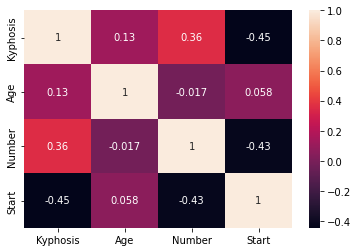

In [258]:
sns.heatmap(Kyphosis_df.corr(), annot = True)

# Training the model

In [260]:
X = Kyphosis_df.drop(['Kyphosis'], axis =1)

In [261]:
X

Age  Number  Start
0    71       3      5
1   158       3     14
2   128       4      5
3     2       5      1
4     1       4     15
..  ...     ...    ...
76  157       3     13
77   26       7     13
78  120       2     13
79   42       7      6
80   36       4     13

[81 rows x 3 columns]

In [262]:
y = Kyphosis_df['Kyphosis']

In [263]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3 )

In [265]:
X_train.shape

(56, 3)

In [266]:
X_test.shape

(25, 3)

In [267]:
y_test.shape

(25,)

In [268]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [269]:
feature_importance = pd.DataFrame(classifier.feature_importances_, index = X_train.columns, columns = ['importance'])

In [270]:
feature_importance

importance
Age       0.441628
Number    0.220639
Start     0.337732

# Evaluating the model

In [271]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = classifier.predict(X_train)

In [272]:
y_predict_train

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [273]:
cm = confusion_matrix(y_train, y_predict_train)

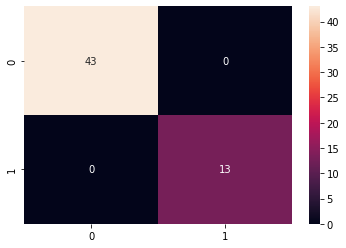

In [274]:
sns.heatmap(cm, annot = True)

In [275]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0])

In [276]:
cm = confusion_matrix(y_test, y_predict_test)

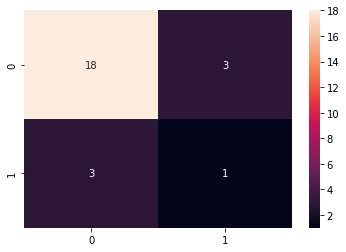

In [277]:
sns.heatmap(cm, annot = True)

In [278]:
print(classification_report (y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.25      0.25      0.25         4

    accuracy                           0.76        25
   macro avg       0.55      0.55      0.55        25
weighted avg       0.76      0.76      0.76        25



# Improving the model

In [279]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators= 50)
random_forest.fit(X_train, y_train)

# n = 50 -> 90% 
# n = 100 -> 70%
# n = !50 -> 60%

RandomForestClassifier(n_estimators=50)

In [280]:
y_predict_train = random_forest.predict(X_train)

In [281]:
y_predict_train

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [282]:
cm = confusion_matrix(y_train, y_predict_train)

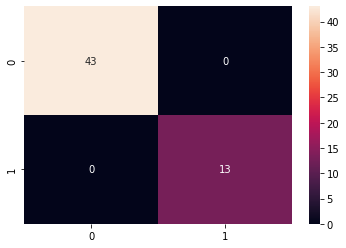

In [283]:
sns.heatmap(cm, annot = True)

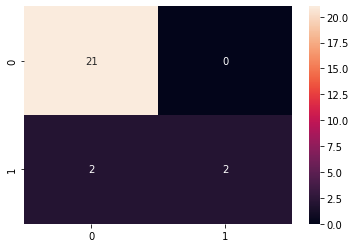

In [284]:
y_predict_test = random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot =True)

In [285]:
print(classification_report (y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      0.50      0.67         4

    accuracy                           0.92        25
   macro avg       0.96      0.75      0.81        25
weighted avg       0.93      0.92      0.91        25

